<a href="https://colab.research.google.com/github/jsebastiants/Spotify_processing/blob/main/Spotify_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly cufflinks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

#importar las librerías para hacer la EDA
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline

<function cufflinks.offline.go_offline>

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/spotify-data.csv', sep=';', encoding= 'unicode_escape')
df.head()

,song_names,artist_names,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,mode,speechiness,instrumentalness,tempo,valence
0,¿A Qué Te Sabe el Café?,Sebastián Romero,50,0.2100,0.843,211156,0.560,0.0734,-9.852,1,0.0302,0.003080,118.047,0.770
1,¿Por Que Te Demoras?,Plan B,65,0.0398,0.891,190512,0.780,0.0548,-6.416,0,0.0701,0.000000,95.998,0.931
2,1 Affoe X 2,Yung Internet,48,0.1660,0.958,284775,0.479,0.3260,-9.134,0,0.2710,0.000056,128.986,0.688
3,1539 N. Calvert,JPEGMAFIA,67,0.2780,0.863,157259,0.717,0.0991,-3.143,0,0.1700,0.082600,152.050,0.357
4,25 Bucks (feat. Purity Ring),Danny Brown,50,0.3200,0.723,210880,0.848,0.1440,-7.110,1,0.0833,0.000000,116.021,0.270


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3a5d37e50>,
      dtype=object)

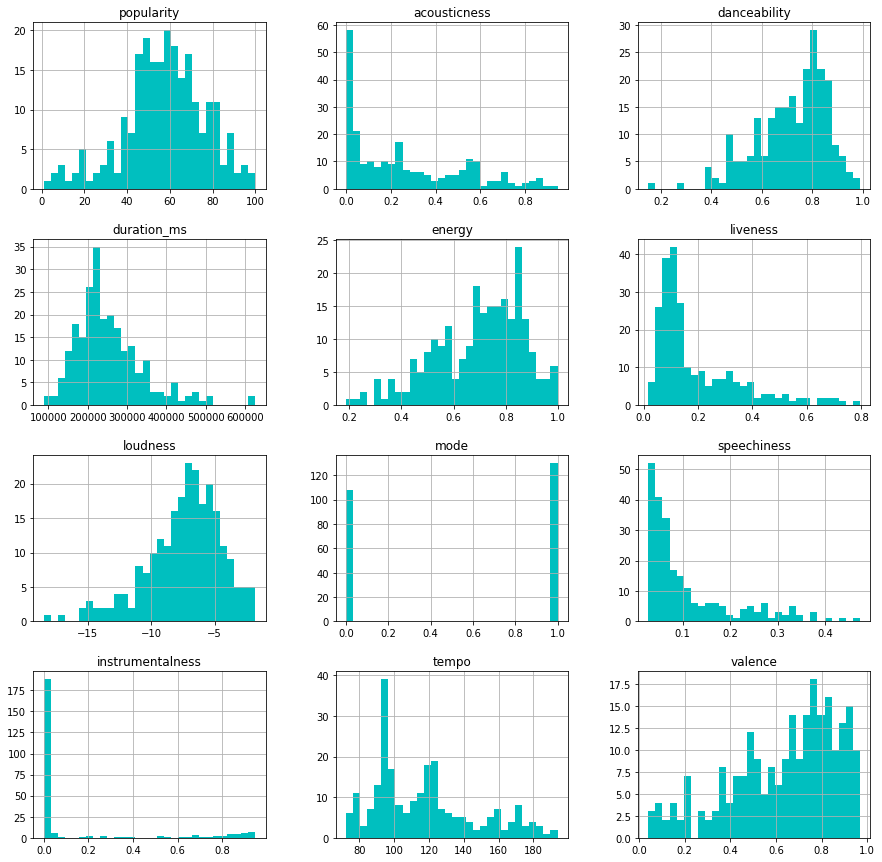

In [ ]:
df.hist(figsize=(15,15), bins=30, color='c')

In [ ]:
df_features = df.iloc[:,2:]
df_features

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,mode,speechiness,instrumentalness,tempo,valence
0,50,0.210000,0.843,211156,0.560,0.0734,-9.852,1,0.0302,0.003080,118.047,0.770
1,65,0.039800,0.891,190512,0.780,0.0548,-6.416,0,0.0701,0.000000,95.998,0.931
2,48,0.166000,0.958,284775,0.479,0.3260,-9.134,0,0.2710,0.000056,128.986,0.688
3,67,0.278000,0.863,157259,0.717,0.0991,-3.143,0,0.1700,0.082600,152.050,0.357
4,50,0.320000,0.723,210880,0.848,0.1440,-7.110,1,0.0833,0.000000,116.021,0.270
...,...,...,...,...,...,...,...,...,...,...,...,...
233,50,0.331000,0.692,234808,0.865,0.1090,-4.244,0,0.1870,0.000000,94.695,0.919
234,50,0.404000,0.794,201253,0.314,0.0852,-13.012,1,0.1830,0.512000,155.996,0.675
235,87,0.182000,0.586,242096,0.616,0.0927,-7.964,1,0.0324,0.000000,148.088,0.719
236,20,0.000583,0.796,448566,0.850,0.1120,-10.030,1,0.0672,0.733000,130.000,0.458


In [ ]:
fig = px.scatter_matrix(df_features)
fig.show(renderer="colab")

In [ ]:
import numpy as np
df_corr = df_features.corr()
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show(renderer="colab")

In [ ]:
fig = px.scatter(df_features, x='valence', y='energy', color='instrumentalness')
fig.show(renderer="colab")

In [ ]:
fig = px.scatter(df_features, x='valence', y='danceability', color='instrumentalness')
fig.show(renderer="colab")

In [ ]:
fig = px.scatter(df_features, x='energy', y='loudness', color='instrumentalness')
fig.show(renderer="colab")

In [ ]:
#Liveness detecta la presencia de una audiencia en la grabación.
#Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se interprete en vivo.
#Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.

fig = px.scatter(df_features, x='valence', y='liveness', color='instrumentalness')
fig.show(renderer="colab")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pca = PCA()
pca.fit(df_features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig= px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show(renderer="colab")

In [ ]:
scaler = MinMaxScaler()
df_features_sc = pd.DataFrame(scaler.fit_transform(df_features))
df_features_sc.columns = df_features.columns
df_features_sc.index = df_features.index

In [ ]:
#boxplot de features que son entre 0 y 1

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_features_sc['acousticness'],
    name="acousticness",
    boxpoints='all',
    boxmean='sd',
    marker_color='rgb(8,81,156)',
    line_color='rgb(9,56,125)'
))

fig.add_trace(go.Box(
    y=df_features_sc['danceability'],
    name="danceability",
    boxpoints='all',
    boxmean='sd',
    marker_color='rgb(8,81,156)',
    line_color='rgb(9,56,125)'
))

fig.add_trace(go.Box(
    y=df_features_sc['energy'],
    name="energy",
    boxpoints='all',
    boxmean='sd',
    marker_color='rgb(8,81,156)',
    line_color='rgb(9,56,125)'
))

fig.add_trace(go.Box(
    y=df_features_sc['liveness'],
    name="liveness",
    boxpoints='all',
    boxmean='sd',
    marker_color='rgb(8,81,156)',
    line_color='rgb(9,56,125)'
))

fig.add_trace(go.Box(
    y=df_features_sc['speechiness'],
    name="speechiness",
    boxpoints='all',
    boxmean='sd',
    marker_color='rgb(8,81,156)',
    line_color='rgb(9,56,125)'
))

fig.add_trace(go.Box(
    y=df_features_sc['valence'],
    name="valence",
    boxpoints='all', 
    boxmean='sd',
    marker_color='rgb(8,81,156)',
    line_color='rgb(9,56,125)'
))

fig.show(renderer="colab")

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=df_features_sc['instrumentalness'], boxpoints='all', marker_color='rgb(8,81,156)', name='instrumentalness',boxmean='sd'))
fig.show(renderer="colab")

In [ ]:
#Hallaremos el número adecuado de clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_features_sc)
    wcss.append(kmeans.inertia_)

In [ ]:
fig = go.Figure(data = go.Scatter(x = [1,2,3,4,5,6,7,8,9,10,11], y = wcss))


fig.update_layout(title='WCSS vs. Cluster number',
                   xaxis_title='Clusters',
                   yaxis_title='WCSS')
fig.show(renderer="colab")

In [ ]:
song_cluster_pipe = Pipeline([('scaler', MinMaxScaler()), ('PCA', PCA(n_components=3)), ('kMeans', KMeans(n_clusters=4, max_iter=500, random_state=24))])
identified_clusters = song_cluster_pipe.fit_predict(df_features.values)
df_with_clusters = df.copy()
df_with_clusters['cluster'] = identified_clusters

In [ ]:
fig= px.scatter_3d(df_with_clusters, x='energy', y='acousticness', z='danceability', color='cluster', opacity=0.7, size='popularity',
                   hover_data=['song_names','artist_names'])
fig.show(renderer="colab")